In [21]:
"""
  Concetar con el entorno de google drive para obtener los datos correspondientes
"""
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
"""
  Librerias necesarias para la implementación del modelo
"""
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#import matplotlib.pyplot as plt

In [23]:
"""
  Especificar el tamaño de las imagenes para trabajar y a su vez especificar la ruta con la cual se va trabajar
"""
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Mineria/DatosFinales/dataset_para_cbam_normal/train'
valid_path = '/content/drive/MyDrive/Mineria/DatosFinales/dataset_para_cbam_normal/val'

In [51]:
"""
  Importar la funcionalidad de VGG16 y implementar el peso en base a imagenet
"""
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [53]:
"""
  Función que considera no entrenar si existen pesso declarados
"""
for layer in inception.layers:
    layer.trainable = False

In [26]:
"""
  Obtener las clases que se encuentran dentro del directorio del dataset
"""
folders = glob('/content/drive/MyDrive/Mineria/DatosFinales/dataset_para_cbam_normal/train/*')

In [52]:
"""
  Declarar el layer a implementarse
"""
x = Flatten()(inception.output)

In [54]:
prediction = Dense(len(folders), activation='softmax')(x)
"""
  Crear el modelo correspondiente en base a resenet con inception v3
"""
model = Model(inputs=inception.input, outputs=prediction)

In [55]:
"""
  Se corresponde en imprimir el modelo declarado
"""
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [62]:
"""
  Especificar al modelo el costo y el metodo de optimización a impelmentar
"""
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [57]:
"""
  Importar las imagenes a data set en base a image generator
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [58]:
"""
  Incializar el tamaño de las iamgense para el dataset de entrenamiento
"""
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Mineria/DatosFinales/dataset_para_cbam_normal/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3206 images belonging to 4 classes.


In [59]:
"""
  Incializar el tamaño de las iamgense para el dataset de test
"""
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Mineria/DatosFinales/dataset_para_cbam_normal/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 812 images belonging to 4 classes.


In [60]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [63]:
"""
  Entrenar el modelo y especificar la variable para recupear la información del entrenamiento en las metricas
"""
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[es]
)

Epoch 1/5
101/101 [==============================] - 27s 218ms/step - loss: 1.3095 - accuracy: 0.8721 - val_loss: 0.3613 - val_accuracy: 0.9372
Epoch 2/5
101/101 [==============================] - 20s 199ms/step - loss: 0.1455 - accuracy: 0.9707 - val_loss: 0.2809 - val_accuracy: 0.9520
Epoch 3/5
101/101 [==============================] - 20s 194ms/step - loss: 0.0662 - accuracy: 0.9838 - val_loss: 0.1708 - val_accuracy: 0.9643
Epoch 4/5
101/101 [==============================] - 19s 186ms/step - loss: 0.0381 - accuracy: 0.9900 - val_loss: 0.2518 - val_accuracy: 0.9544
Epoch 5/5
101/101 [==============================] - 19s 186ms/step - loss: 0.0936 - accuracy: 0.9813 - val_loss: 0.2913 - val_accuracy: 0.9557


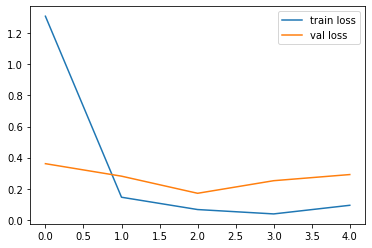

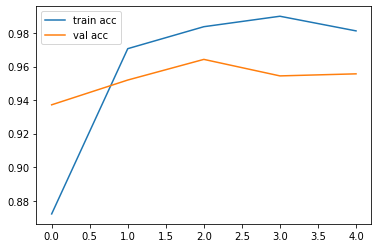

<Figure size 432x288 with 0 Axes>

In [64]:
"""
  Representación grafica de los datos correspondientes al entrenar el modelo
"""
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [65]:
"""
  Exportar en un archivo h5
"""
from tensorflow.keras.models import load_model
model.save('model_resnet152V2.h5')

In [66]:
"""
  Realizar la predicción del modelo
"""
y_pred = model.predict(test_set)

In [67]:
loss, accuracy = model.evaluate(test_set,batch_size=32)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))


26/26 [==============================] - 4s 144ms/step - loss: 0.2913 - accuracy: 0.9557
test_loss: 29.13
test_accuracy: 95.57


In [68]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 3, 3, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 3, 0, 2, 1, 3, 1, 1, 0, 3,
       3, 3, 1, 1, 1, 3, 1, 2, 1, 0, 0, 3, 3, 2, 2, 1, 2, 1, 0, 3, 1, 3,
       3, 3, 2, 3, 0, 3, 1, 1, 1, 3, 2, 3, 3, 0, 0, 0, 0, 2, 3, 3, 0, 3,
       3, 3, 0, 3, 2, 0, 1, 1, 3, 3, 0, 1, 0, 3, 0, 3, 3, 3, 2, 1, 0, 1,
       3, 2, 2, 0, 0, 2, 3, 3, 1, 0, 2, 2, 1, 2, 1, 0, 3, 0, 2, 2, 0, 1,
       2, 0, 0, 0, 2, 3, 2, 2, 3, 2, 2, 2, 0, 1, 0, 3, 0, 1, 3, 0, 1, 1,
       0, 2, 0, 1, 2, 1, 3, 1, 3, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1,
       0, 3, 0, 1, 1, 3, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 3, 2,
       1, 1, 0, 3, 3, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 3, 3,
       2, 0, 3, 1, 3, 2, 1, 3, 1, 0, 3, 3, 1, 0, 1, 2, 1, 2, 3, 3, 2, 0,
       0, 2, 3, 0, 1, 3, 3, 1, 0, 2, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1,
       0, 1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 3, 1, 1, 0, 0, 0, 2, 2, 2, 0, 3,
       1, 2, 0, 1, 1, 3, 2, 0, 1, 0, 1, 0, 2, 0, 3, 2, 1, 1, 0, 1, 3, 2,
       2, 1, 0, 2, 2, 3, 2, 3, 3, 2, 2, 3, 0, 1, 0,